In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
hotels = pd.read_excel("D:/STUDIES/Data Visualization/Data/HotelCustomersDataset.xlsx")

In [3]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
hotels.shape

(83590, 29)

In [8]:
hotels["date"] = (pd.to_datetime("2018-12-31")- pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [9]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [11]:
room_nights = hotels.groupby('date').agg({"RoomNights":"sum", "BookingsCanceled":"sum"})

In [13]:
room_nights

,RoomNights,BookingsCanceled
date,,
2016-01-01,147,0
2016-01-02,170,0
2016-01-03,217,0
2016-01-04,38,0
2016-01-05,211,0
...,...,...
2018-12-27,125,0
2018-12-28,139,0
2018-12-29,250,0


In [15]:
quarterly_bookings = room_nights.resample("Q").sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_56056\2447873892.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_bookings = room_nights.resample("Q").sum()


In [16]:
quarterly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


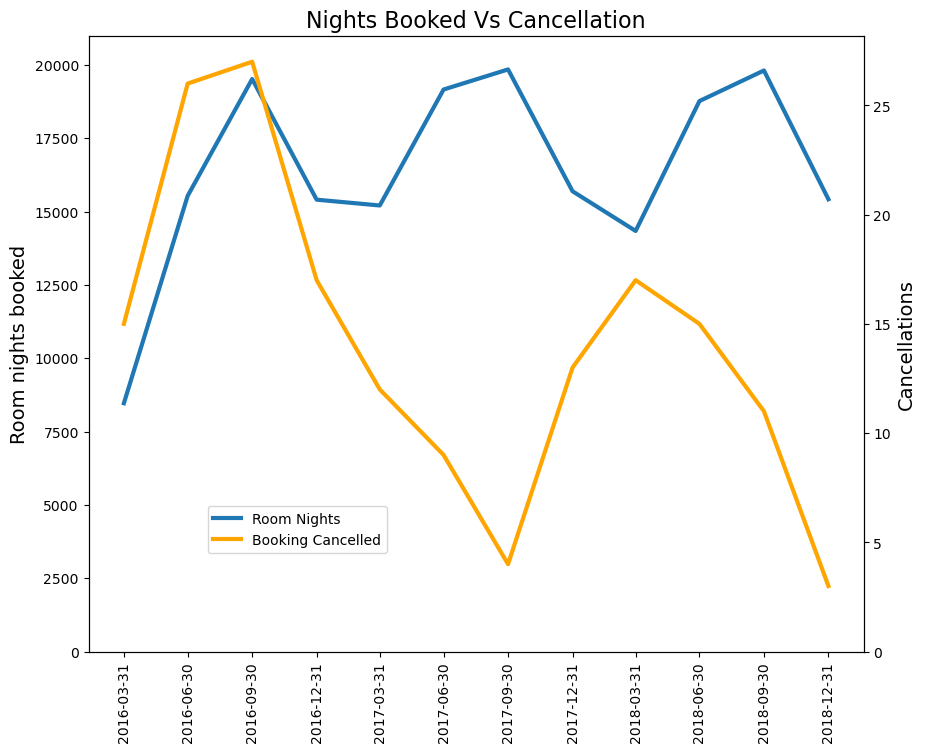

In [43]:
fig, ax = plt.subplots(figsize = (10,8))

ax.plot(quarterly_bookings.index,
        quarterly_bookings["RoomNights"],
        label="Room Nights",
        linewidth = 3)

ax.set_title("Nights Booked Vs Cancellation", fontsize = 16)
ax.set_ylabel("Room nights booked", fontsize = 14)
ax.set_ylim(0,21000)
ax.set_xticks(quarterly_bookings.index[::1])
plt.xticks(rotation = 90)


ax2 = ax.twinx()

ax2.plot(quarterly_bookings.index,
         quarterly_bookings["BookingsCanceled"],
        label="Booking Cancelled",
        color = "orange",
        linewidth = 3)
ax2.set_ylabel("Cancellations", fontsize = 14)
ax2.set_ylim(0)
ax2.set_xticks(quarterly_bookings.index[::1])

fig.legend(bbox_to_anchor=(.43,.30))
